## Problem 1: APT

### c)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sharpe ratio')

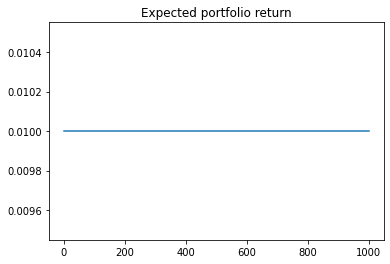

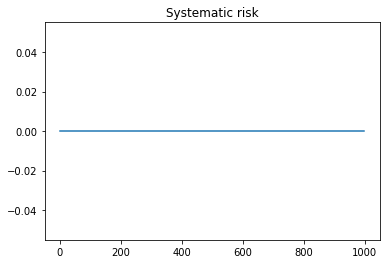

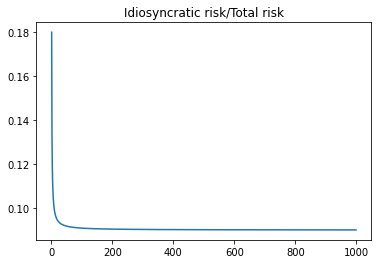

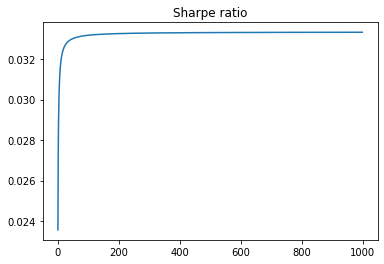

In [2]:
# parameters
alpha_b = 0.03
beta_b = 0.5
beta_a = 0.5
w_a = 0.5
mu_f = 0.08
sigma_b = 0.3
sigma_a = 0.3
r_0 = 0.04

N_A = np.arange(1,1000)

#expected return of the portfolio
R_p = alpha_b - 0.5 * r_0
plt.figure()
plt.plot(N_A,R_p*np.ones(999))
plt.title("Expected portfolio return")
#systematic risk
s_p = 0
plt.figure()
plt.plot(N_A,s_p*np.ones(999))
plt.title("Systematic risk")
# idiosyncratic risk of hedged portfolio/total risk
u_p = 0.09 + 0.09/N_A
plt.figure()
plt.plot(N_A,u_p)
plt.title("Idiosyncratic risk/Total risk")
# Sharpe ratio
sh_p = 0.01/(np.sqrt(0.09+0.09/N_A))
plt.figure()
plt.plot(N_A,sh_p)
plt.title("Sharpe ratio")

### e)

Text(0.5, 1.0, 'Sharpe ratio')

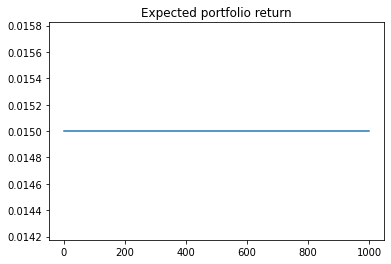

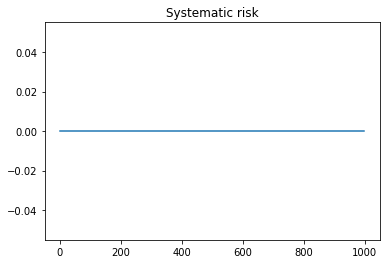

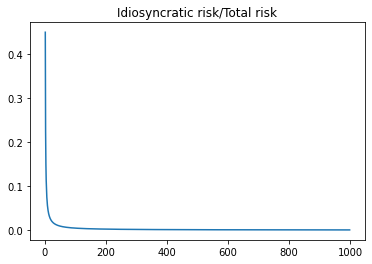

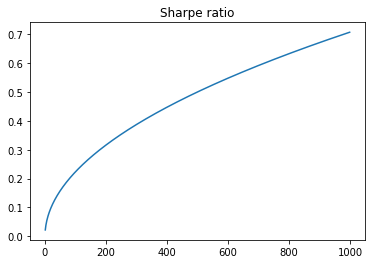

In [3]:
N = np.arange(1,1000)
#expected return of the portfolio
R_p = 0.015
plt.figure()
plt.plot(N,R_p*np.ones(999))
plt.title("Expected portfolio return")
#systematic risk
s_p = 0
plt.figure()
plt.plot(N,s_p*np.ones(999))
plt.title("Systematic risk")
# idiosyncratic risk of hedged portfolio/total risk
u_p = 0.45/N
plt.figure()
plt.plot(N,u_p)
plt.title("Idiosyncratic risk/Total risk")
# Sharpe ratio
sh_p = 0.015/(np.sqrt(0.45/N))
plt.figure()
plt.plot(N,sh_p)
plt.title("Sharpe ratio")

## Problem 2: Understanding Warren Buffett's Performance

In [4]:
import wrds
import pandas as pd

In [5]:
db = wrds.Connection()
db.create_pgpass_file()

Loading library list...
Done
Enter your WRDS username [jonkq]:jonkq
Enter your password:········


In [6]:
brk=db.raw_sql("select date, ret from crsp.msf where permno in (17778) and date>='1976-01-01' and date<='2019-12-31'")
brk.to_csv('brk.csv')

In [7]:
r0 = db.raw_sql("select mcaldt, tmytm from crsp.tfz_mth_rf where kytreasnox=2000001 and mcaldt>='1976-09-01' and mcaldt<='2019-12-31'")
# brk starts at 1971-09 (not 1971-01)

In [8]:
# conformity check
len(r0) == len(brk)

True

In [9]:
dates = brk.date
brk = brk.ret

In [10]:
r0 = r0.tmytm.squeeze()

In [11]:
# simple monthly rates
r0 = (np.exp(r0/100)-1)/12

In [12]:
# create data frame
rets = pd.DataFrame({'brk':brk, 'r0':r0})
rets['date'] = dates
rets = rets.set_index('date')

In [13]:
# remove rows containing NaN
nan = rets.brk.isna()
nas = [i for i, x in enumerate(nan) if x]
nas = dates[nas]
rets = rets.drop(nas)

### b)

In [14]:
brk_m = 12*100*((rets.brk-rets.r0).mean())
brk_s = 100*np.sqrt(12)*((rets.brk-rets.r0).std())
print('Annualized excess returns\n\nMean: {:0.3}%\nStDev: {:0.3}%\nSharpe ratio: {:0.3}'.format(brk_m, brk_s, brk_m/brk_s))

Annualized excess returns

Mean: 18.2%
StDev: 23.2%
Sharpe ratio: 0.785


In [15]:
# fama-french factors
fff = pd.read_table('F-F_Research_Data_5_Factors_2x3.CSV', sep=',', index_col=0)
fff = fff/100

In [16]:
dates2 = list(fff.index)

In [17]:
x1 = list(range(13*12+4))
x2 = list(range(len(fff)-14,len(fff)))
x1 = [dates2[i] for i in x1]
x2 = [dates2[i] for i in x2]
fff = fff.drop(x1)
fff = fff.drop(x2)

In [18]:
# there are 3 missing months in rets
# drop them in fff

In [19]:
dates = list(rets.index)
dates = [dates[i].strftime('%Y-%m-%d') for i in  range(len(dates))]
dates3 = [dates[i].split('-')[0] + dates[i].split('-')[1] for i in range(len(dates))]

In [20]:
dates2 = list(fff.index)
dates3 = [int(dates3[i]) for i in range(len(dates3))]

In [21]:
mis = []

for i in range(518):
    if dates2[i] < dates3[i]:
        dates3.insert(i, dates2[i])
        mis.append(i)
    if dates3[i] < dates2[i]:
        dates2.insert(i, dates3[i])
        mis.append(i)

In [22]:
mis_dates = [dates2[i] for i in mis]
fff = fff.drop(mis_dates)

##### Fama-French

In [23]:
fff_m = 100*12*fff.apply(np.mean)
fff_s = 100*np.sqrt(12)*fff.apply(np.std)

In [24]:
print('Mkt-RF\nMean: {:.3}%\nStDev: {:.3}%\nSharpe ratio: {:.3}'.format(fff_m[0], fff_s[0], fff_m[0]/fff_s[0]))

Mkt-RF
Mean: 7.98%
StDev: 15.2%
Sharpe ratio: 0.526


In [25]:
print('SMB\nMean: {:.3}%\nStDev: {:.3}%\nSharpe ratio: {:.3}'.format(fff_m[1], fff_s[1], fff_m[1]/fff_s[1]))

SMB
Mean: 2.2%
StDev: 9.92%
Sharpe ratio: 0.222


In [26]:
print('HML\nMean: {:.3}%\nStDev: {:.3}%\nSharpe ratio: {:.3}'.format(fff_m[2], fff_s[2], fff_m[2]/fff_s[2]))

HML
Mean: 2.68%
StDev: 9.92%
Sharpe ratio: 0.271


### c)

In [27]:
rets['brk_e'] = rets.brk-rets.r0

In [28]:
mom = pd.read_table('F-F_Momentum_Factor.CSV', sep=',', index_col=0)
mom = mom/100
mom = mom.drop(mis_dates)
mom_m = 100*12*mom.mean().item()
mom_s = 100*np.sqrt(12)*mom.std().item()

In [29]:
print('MOM\nMean: {:.3}%\nStDev: {:.3}%\nSharpe ratio: {:.3}'.format(mom_m, mom_s, mom_m/mom_s))

MOM
Mean: 7.44%
StDev: 15.2%
Sharpe ratio: 0.49


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
Y = np.asarray(rets.brk_e)
alphas = []
betas = []
resid = []
r2 = []
X = np.array([fff['Mkt-RF'], fff.SMB, fff.HML, mom.squeeze(), fff.RMW, fff.CMA])
X = X.transpose()

In [32]:
for j in range(X.shape[1]):
    x = X[:,:j+1]
    fit = LinearRegression().fit(x,Y)
    alphas.append(fit.intercept_)
    betas.append(fit.coef_)
    r2.append(fit.score(x,Y))
    resid.append(Y-fit.predict(x))

In [33]:
# information ratios
irs = []
for i in range(len(alphas)):
    irs.append(alphas[i]/np.std(resid[i]))

#### Mkt-RF

In [34]:
print('Alpha: {:.3}\nBeta: {:.3}\nR-squared: {:.3}\nInformation ratio: {:.3}'.format(alphas[0], betas[0].item(), r2[0], irs[0]))

Alpha: 0.0105
Beta: 0.693
R-squared: 0.206
Information ratio: 0.177


#### 3-Factor (Mkt+SMB+HML)

In [35]:
print('Alpha: {:.3}\nBetas\nMkt: {:.3}\nSMB: {:.3}\nHML: {:.3}\nR-squared: {:.3}\nInformation ratio: {:.3}'.format(alphas[2], betas[2][0], betas[2][1], betas[2][2], r2[2], irs[2]))

Alpha: 0.00903
Betas
Mkt: 0.824
SMB: -0.271
HML: 0.508
R-squared: 0.266
Information ratio: 0.158


#### 4-Factor (Mkt+SMB+HML+MOM)

In [36]:
print('Alpha: {:.3}\nBetas\nMkt: {:.3}\nSMB: {:.3}\nHML: {:.3}\nMOM: {:.3}\nR-squared: {:.3}\nInformation ratio: {:.3}'.format(alphas[3], betas[3][0], betas[3][1], betas[3][2], betas[3][3], r2[3], irs[3]))

Alpha: 0.00852
Betas
Mkt: 0.836
SMB: -0.276
HML: 0.533
MOM: 0.0607
R-squared: 0.268
Information ratio: 0.149


#### 7-Factor (Mkt+SMB+HML+MOM+RMW+CMA)

In [37]:
print('Alpha: {:.3}\nBetas\nMkt: {:.3}\nSMB: {:.3}\nHML: {:.3}\nMOM: {:.3}\nRMW: {:.3}\nCMA: {:.3}\nR-squared: {:.3}\nInformation ratio: {:.3}'.format(alphas[5], betas[5][0], betas[5][1], betas[5][2], betas[5][3], betas[5][4], betas[5][5], r2[5], irs[5]))

Alpha: 0.00698
Betas
Mkt: 0.866
SMB: -0.155
HML: 0.484
MOM: 0.0319
RMW: 0.423
CMA: -0.0152
R-squared: 0.284
Information ratio: 0.123


### d)
The FF5 factors are constructed using 6 value-weighted portfolios formed on size and B/M. The Size breakpoint is the NYSE median market cap, and the B/M breakpoints are the 30th and 70th percentiles of B/M for NYSE stocks.

RMW is the profitability factor. RMW (Robust Minus Weak) is the average return on the two robust operating profitability portfolios minus the average return on the two weak operating profitability portfolios;
 	
RMW = 1/2 (Small Robust + Big Robust) - 1/2 (Small Weak + Big Weak)	 

CMA is the investment factor. CMA (Conservative Minus Aggressive) is the average return on the two conservative investment portfolios minus the average return on the two aggressive investment portfolios;
	 
CMA =1/2 (Small Conservative + Big Conservative) - 1/2 (Small Aggressive + Big Aggressive).

Different systematic pattern of profitability could be a source of difference in returns, which RMW takes into account. Various companies might have diverse investment preferences, either more risky or more risk averse, which CMA takes into account.

### e)
We see from the market beta of Buffet that his investments lie in assets with a high systematic risk, since they range from 0.7 to 0.86. Moreover, we see that he invests in big companies (high market cap) since the SMB loading is always negative, meaning he looses the small minus big premium. He also tends to invest in highly valued companies since the HML loading is about 0.5. This sounds a bit surprising knowing he is an advocate of value investing which prefers low valuations. This might be explained by the size of his investments which forces him towards big companies, which tend to be more highly valued. 

### f)
The exposure to common risk factors do not explain all of Buffett's performance. Firstly because R-squared never exceeds 0.28. Secondly, both the alpha and the information ratio remain positive with added covariates, although they are diminished, which shows that these factors still help explain some of Buffett's performance. 

### g)

In [38]:
dates2.remove(dates2[mis[0]])
dates2.remove(dates2[mis[1]])
dates2.remove(dates2[mis[2]])

In [39]:
rets['date'] = dates2
rets = rets.set_index('date')

In [40]:
fff['brk'] = rets.brk

In [41]:
mu = np.array(fff.mean())
sd = np.array(fff.std())
cov = np.array(fff.cov())
cov_inv = np.linalg.inv(cov)

In [42]:
A = cov_inv.sum()
B = cov_inv.sum(0).dot(mu)
C = mu.transpose().dot(cov_inv).dot(mu)
D = A*C - B**2
mu_t = 0.10
lam = (C - mu_t*B)/D
gam = (mu_t*A - B)/D

In [43]:
w_opt = lam * cov_inv.sum(1) + gam * cov_inv.dot(mu)
std_opt = np.sqrt(w_opt.transpose().dot(cov).dot(w_opt))

In [44]:
print('Optimal portfolio weights')
for i in range(len(fff.columns)):
    cols = fff.columns
    print(cols[i], '{:.3}'.format(w_opt[i]))

Optimal portfolio weights
Mkt-RF -2.39
SMB -3.64
HML -4.39
RMW -3.08
CMA -0.657
RF 9.06
brk 6.1


In [45]:
print('Optimal portfolio annualized volatility: {:.0f}%'.format(100*np.sqrt(12)*std_opt))

Optimal portfolio annualized volatility: 135%


### h)

In [46]:
Y = rets.iloc[:(19*12-1),2]
X = np.array([fff['Mkt-RF'], fff.SMB, fff.HML, mom.squeeze(), fff.RMW, fff.CMA])
X = X.transpose()
X = X[:(19*12-1),:]

In [47]:
alphas2 = []
betas2 = []
resid2 = []
r22 = []

for j in range(X.shape[1]):
    x = X[:,:j+1]
    fit = LinearRegression().fit(x,Y)
    alphas2.append(fit.intercept_)
    betas2.append(fit.coef_)
    r22.append(fit.score(x,Y))
    resid2.append(Y-fit.predict(x))

In [48]:
# information ratios
irs2 = []
for i in range(len(alphas2)):
    irs2.append(alphas2[i]/np.std(resid2[i]))

In [49]:
irs2

[0.2699933041545225,
 0.267952588277168,
 0.23109745979362337,
 0.22728972723232566,
 0.20036523200632098,
 0.19851034337452073]

In [50]:
alphas2

[0.01815704527419013,
 0.01800213842488222,
 0.01531255340617119,
 0.015059051087782249,
 0.013242335517773159,
 0.013119241799563783]

In [51]:
betas2

[array([0.91995278]),
 array([0.90123965, 0.12518735]),
 array([1.03313942, 0.16572594, 0.50359023]),
 array([1.0300836 , 0.16572501, 0.51003236, 0.02712652]),
 array([1.04263535, 0.22569352, 0.62888635, 0.00616174, 0.4008309 ]),
 array([1.04588516, 0.22686134, 0.60408418, 0.00242339, 0.41335613,
        0.05757546])]

Cleary, the performance of Buffet decreased after 1995 since the alphas from 1976 to 1995 are much higher than across the whole period, with the information ratios being more than double during that first period.

An explanation could be a higher dependence to these factors after 1995, removing Buffet's edge.